# 1. Exploring Auto Insurance Data

We found a dataset that has customer data for an insurance company with attributes for each customer like insurance type, cleaim amount, customer lifetime value, and other demographic information.


# 2. Bussiness problem

Based on the dataset, below is the analysis we want to dive into.

1. Sales Channel Performance Analysis:

- Objective: Determine the effectiveness of different sales channels.

- Dataset Feature: Sales Channel.

2. Impact of Attributes on Customer Lifetime Value:

- Objective: Understand how factors affect the lifetime value of customers.

- Dataset Features: Sales Channel, Income, Education.

3. Total Claims Analysis :

- Objective: Explore employement state, vehicle class and size’s impact on total claims

- Dataset Features: total claims, Vehicle Class, Vehicle Size.

# 3. Attributes:

- Customer: Unique ID

- State: Customer's state of residence

- Customer Lifetime Value: Predicted lifetime value

- Response: Response to marketing (Yes/No)

- Coverage: Level of insurance coverage

- Education: Highest education level

- Effective To Date: Policy start date

- EmploymentStatus: Employment status

- Gender: Customer's gender

- Income: Annual income

- Location Code: Location type (Suburban, Rural, Urban)

- Marital Status: Marital status

- Monthly Premium Auto: Monthly premium

- Months Since Last Claim: Months since last claim

- Months Since Policy Inception: Months since policy start

- Number of Open Complaints: Number of open complaints

- Number of Policies: Number of policies held

- Policy Type: Type of insurance policy

- Policy: Specific policy ID

- Renew Offer Type: Type of renewal offer

- Sales Channel: Sales channel

- Total Claim Amount: Total claim amount

- Vehicle Class: Type of insured vehicle

- Vehicle Size: Size category of vehicle

# 4. Data preprocessing
### first let's take a look of our dataset.

In [ ]:
#Previewing the Data
import pandas as pd
df= pd.read_csv('abcde.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Then, we will see which columns are present in the data. Then, we'll check for nulls in all these columns.

In [ ]:
# Extract column names
column_names = df.columns.tolist()

print("Column Names:")
for name in column_names:
    print(name)

Column Names:
Customer
State
Customer Lifetime Value
Response
Coverage
Education
Effective To Date
EmploymentStatus
Gender
Income
Location Code
Marital Status
Monthly Premium Auto
Months Since Last Claim
Months Since Policy Inception
Number of Open Complaints
Number of Policies
Policy Type
Policy
Renew Offer Type
Sales Channel
Total Claim Amount
Vehicle Class
Vehicle Size


In [ ]:
# Checking for Nulls

columns_to_check = [
    'Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
    'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
    'Location Code', 'Marital Status', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy',
    'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class',
    'Vehicle Size'
]

# Check for nulls in specified columns
for column in columns_to_check:
    null_count = df[column].isnull().sum()
    print(f"Nulls in {column}: {null_count}")


Nulls in Customer: 0
Nulls in State: 0
Nulls in Customer Lifetime Value: 0
Nulls in Response: 0
Nulls in Coverage: 0
Nulls in Education: 200
Nulls in Effective To Date: 0
Nulls in EmploymentStatus: 0
Nulls in Gender: 300
Nulls in Income: 0
Nulls in Location Code: 0
Nulls in Marital Status: 0
Nulls in Monthly Premium Auto: 0
Nulls in Months Since Last Claim: 0
Nulls in Months Since Policy Inception: 0
Nulls in Number of Open Complaints: 0
Nulls in Number of Policies: 0
Nulls in Policy Type: 0
Nulls in Policy: 0
Nulls in Renew Offer Type: 0
Nulls in Sales Channel: 0
Nulls in Total Claim Amount: 0
Nulls in Vehicle Class: 0
Nulls in Vehicle Size: 0


### As we can see, In the columns 'Education' we have 200 missing values and in the column 'Gender' we have 300 missing values. We write code to fill in nulls with the mode of that column.

In [ ]:
# Replace nulls in the "Gender" column with mode
gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)

# Verify that nulls have been replaced
null_count_after = df['Gender'].isnull().sum()
print(f"Nulls in Gender after replacing with mode: {null_count_after}")


Nulls in Gender after replacing with mode: 0


In [ ]:
#Replace nulls in the "Education" column with mode
# Replace nulls in the "Gender" column with mode
education_mode = df['Education'].mode()[0]
df['Education'] = df['Education'].fillna(gender_mode)

# Verify that nulls have been replaced
null_count_after = df['Education'].isnull().sum()
print(f"Nulls in  after replacing with mode: {null_count_after}")


Nulls in  after replacing with mode: 0


### We can see in the 'Income' column that we have some records as '0'. Let us replace that with the median value of the column.

In [ ]:
# Replace 0 values in the "Income" column with median
median_income = df[df['Income'] != 0]['Income'].median()
df['Income'] = df['Income'].replace(0, median_income)

# Verify that 0 values have been replaced
zero_count_after = (df['Income'] == 0).sum()
print(f"Zero values in Income after replacing with median: {zero_count_after}")


Zero values in Income after replacing with median: 0


### Now let us do some EDA.

In [ ]:
# Maximum and minimum of Vehicle Class
max_vehicle_class = df['Vehicle Class'].max()
min_vehicle_class = df['Vehicle Class'].min()

# Maximum and minimum of Vehicle Size
max_vehicle_size = df['Vehicle Size'].max()
min_vehicle_size = df['Vehicle Size'].min()

# Average and standard deviation of Total Claim Amount
average_total_claim_amount = df['Total Claim Amount'].mean()
std_total_claim_amount = df['Total Claim Amount'].std()

# Mode of Gender
mode_gender = df['Gender'].mode()[0]

# Printing the results
print("Max Vehicle Class:", max_vehicle_class)
print("Min Vehicle Class:", min_vehicle_class)
print("Max Vehicle Size:", max_vehicle_size)
print("Min Vehicle Size:", min_vehicle_size)
print("Average Total Claim Amount:", average_total_claim_amount)
print("Standard Deviation of Total Claim Amount:", std_total_claim_amount)
print("Mode of Gender:", mode_gender)

Max Vehicle Class: Two-Door Car
Min Vehicle Class: Four-Door Car
Max Vehicle Size: Small
Min Vehicle Size: Large
Average Total Claim Amount: 434.0887943128969
Standard Deviation of Total Claim Amount: 290.5000918031134
Mode of Gender: F


# 5. Exploraatory analysis
### Let us create some basic visualizations. Here, we see total claim amount distribution by vehicle size.

#### 1.Sales Channel Performance Analysis:
##### In our first business problem, we want to find out which sales channel is the most effective in the sale of insurance policies.This will help us focus our resources on the most effective channel.

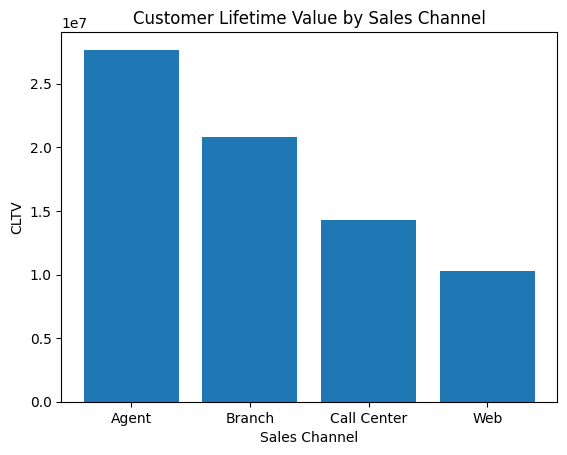

In [ ]:
# prompt: Show chart of customer lifetime value grouped by sales channel
import matplotlib.pyplot as plt

# Group CLTV by sales channel
grouped_df = df.groupby('Sales Channel')['Customer Lifetime Value'].sum()

# Create a bar chart
plt.bar(grouped_df.index, grouped_df.values)
plt.xlabel('Sales Channel')
plt.ylabel('CLTV')
plt.title('Customer Lifetime Value by Sales Channel')
plt.show()

This chart shows the 4 various sales channels that insurance sales are achieved. Evidently, traditional methods such as the sales agents and branch contribute the most to auto-insurance sales.
To measure overall sales, we decided to leverage the Customer Lifetime Value, as this metric not only considers the sales, but also factors in the behavioral impact on claims as well as time-based customer value.
Focusing on mobilizing sales agents and improving sales operations through agents and at the branches should increase auto insurance sales overall.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### This code creates a pie chart illustrating the distribution of sales across different sales channels. Each slice of the pie represents a sales channel, with labels showing both the percentage and the absolute number of sales for each channel.

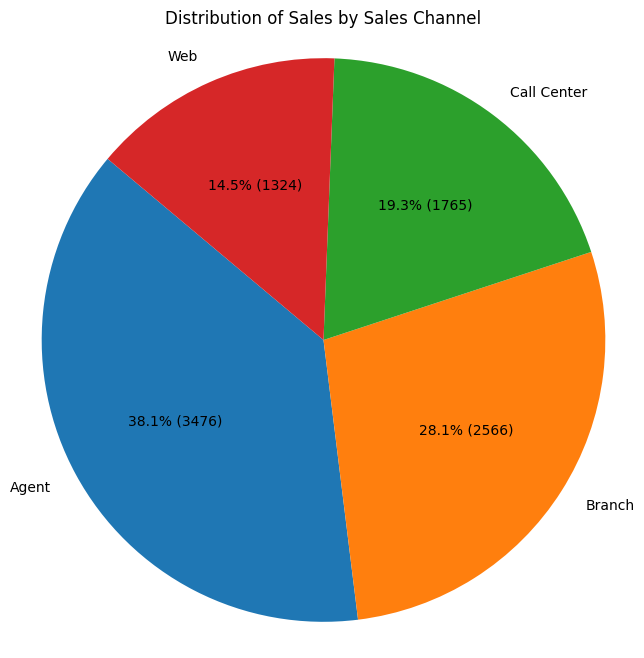

In [ ]:
import matplotlib.pyplot as plt

# Group sales by sales channel
sales_count_by_channel = df.groupby('Sales Channel').size()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_count_by_channel, labels=sales_count_by_channel.index, autopct=lambda p:f'{p:.1f}% ({int(p*sum(sales_count_by_channel)/100)})', startangle=140)
plt.title('Distribution of Sales by Sales Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 2.Impact of Attributes on Customer Lifetime Value:

#### This code examines the relationship between income levels and average customer lifetime value.It groups the data by income and calculates the average customer lifetime value for each income level. The results are plotted on a line chart, illustrating how income influences customer lifetime value.


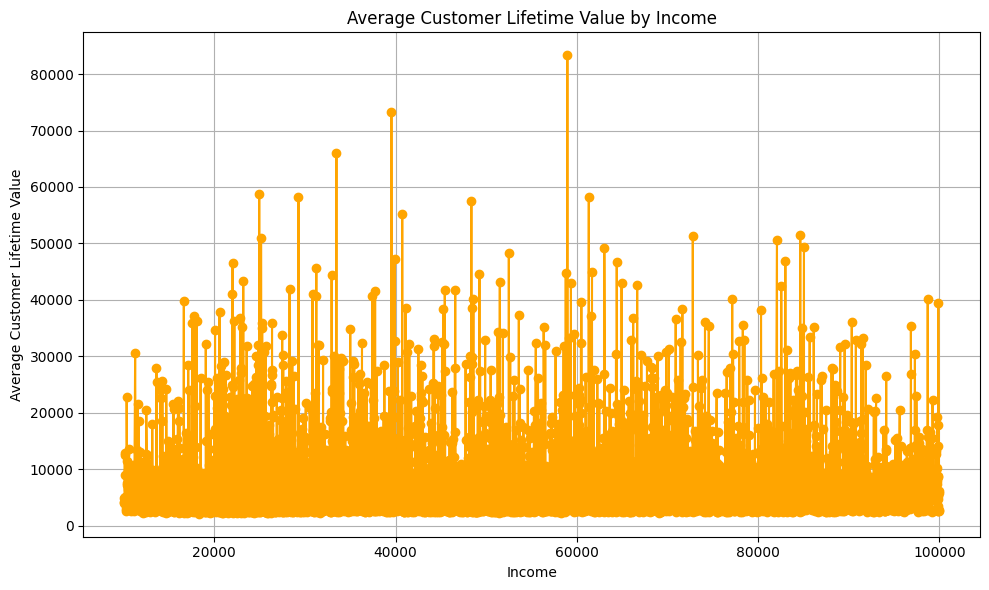

In [ ]:
import matplotlib.pyplot as plt

# Group data by Income and calculate the average Customer Lifetime Value
lifetime_value_by_income = df.groupby('Income')['Customer Lifetime Value'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(lifetime_value_by_income['Income'], lifetime_value_by_income['Customer Lifetime Value'], marker='o', color='orange')
plt.xlabel('Income')
plt.ylabel('Average Customer Lifetime Value')
plt.title('Average Customer Lifetime Value by Income')
plt.grid(True)
plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### This code investigates the influence of education levels on average customer lifetime value. It groups the data by education level and calculates the average customer lifetime value for each education category. The results are presented using a bar chart, offering insights into how education impacts customer lifetime value.

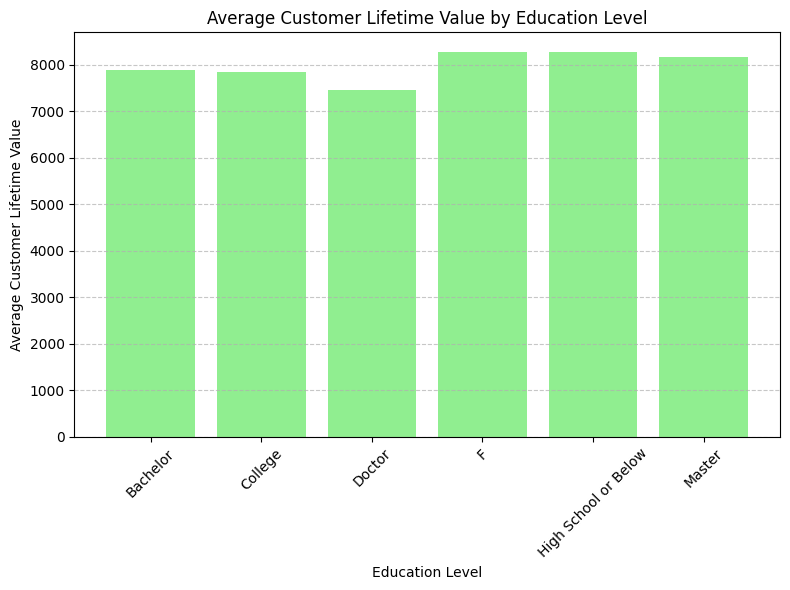

In [ ]:
import matplotlib.pyplot as plt

# Group data by Education and calculate the average Customer Lifetime Value
lifetime_value_by_education = df.groupby('Education')['Customer Lifetime Value'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(lifetime_value_by_education['Education'], lifetime_value_by_education['Customer Lifetime Value'], color='lightgreen')
plt.xlabel('Education Level')
plt.ylabel('Average Customer Lifetime Value')
plt.title('Average Customer Lifetime Value by Education Level')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Here we have planned on exploring the relationship between CLV and different combinations of Education and Employment

/home/jupyter/notebook-env/lib/python3.11/site-packages/seaborn/categorical.py:3197: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


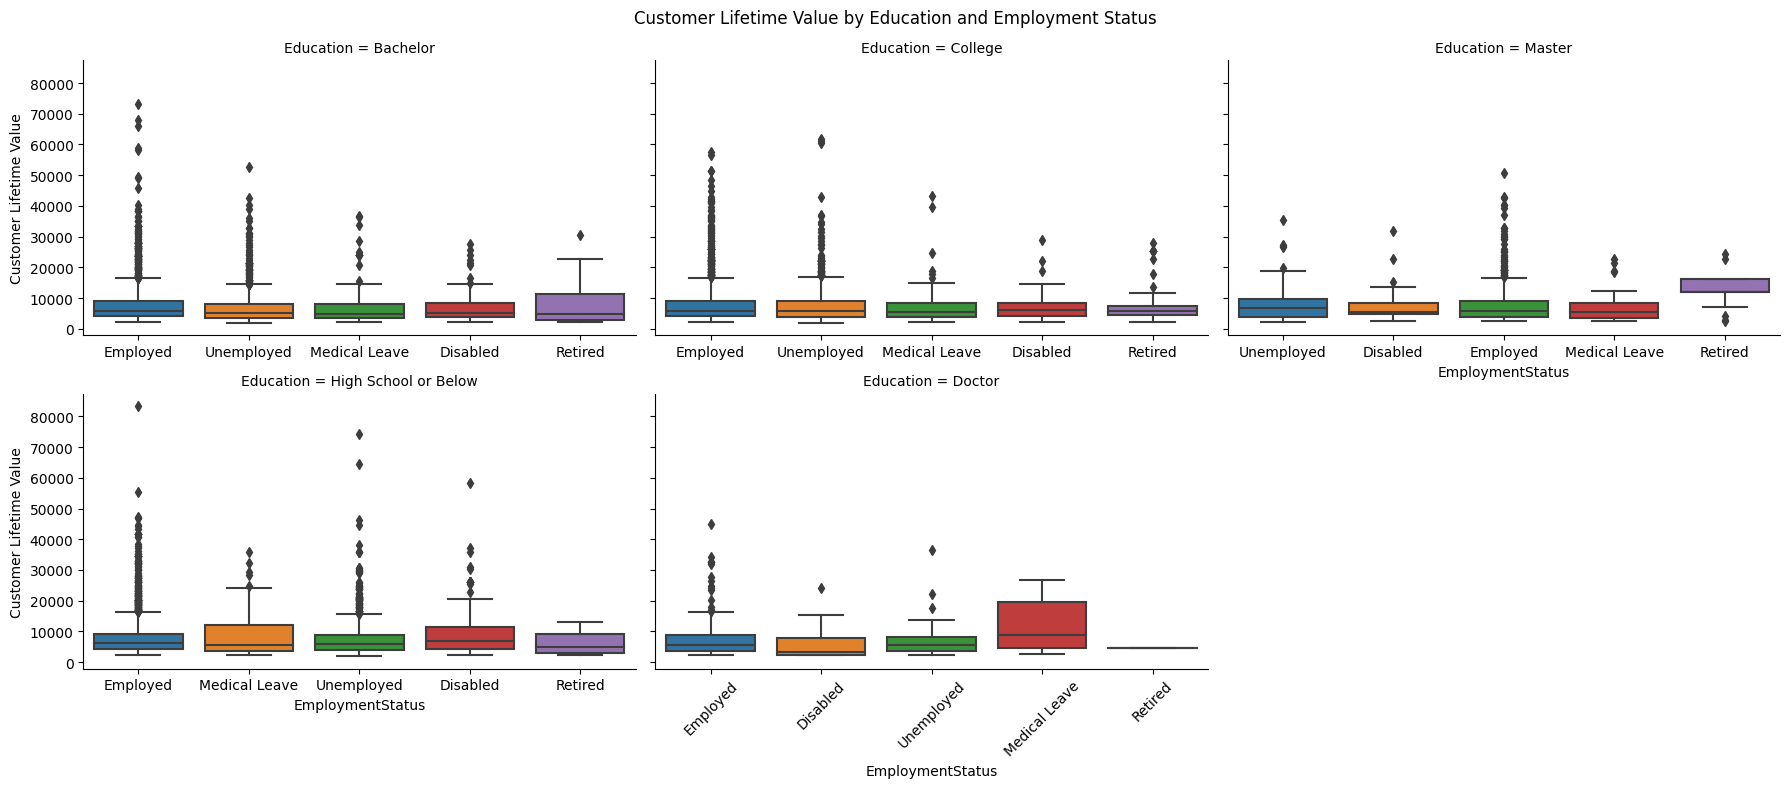

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Adjust the path based on where you upload the file in Google Colab
df = pd.read_csv('abcde.csv')

# Visualization
# Use seaborn's catplot to create a facet grid that shows the relationship between combinations of Education and Employment Status against Customer Lifetime Value
g = sns.catplot(
    x='EmploymentStatus',
    y='Customer Lifetime Value',
    col='Education',
    col_wrap=3,  # Adjust based on the number of unique Education values to control the number of columns in the grid
    data=df,
    kind='box',  # You can change this to 'violin' for a different view
    height=4,  # Adjust the height of each facet
    aspect=1.5,  # Adjust the width of each facet
    sharex=False,  # Don't share the x axis labels across facets for readability
    sharey=True  # Share the y axis to compare across facets
)

# Enhance the plot
g.fig.subplots_adjust(top=0.9)  # Adjust the top to make space for the suptitle
g.fig.suptitle('Customer Lifetime Value by Education and Employment Status')
plt.xticks(rotation=45)  # Rotate the x labels if they are too long
plt.tight_layout()

# Show the plot
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 3.Total Claims Analysis by Vehicle Class and Size
##### This code uses a pie chart to show the distribution of total claim amounts and proportion across different vehicle sizes, providing insight into the proportion of claims for each size category.

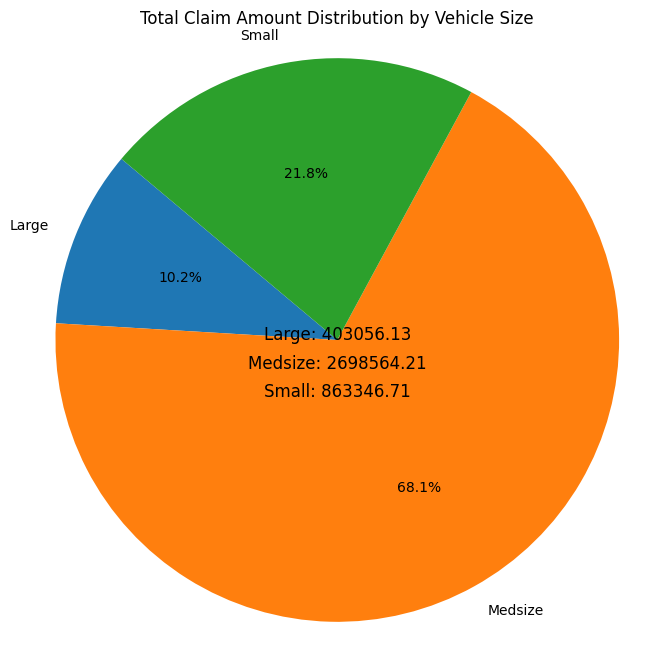

In [ ]:
# Group by vehicle size and calculate the total claim amount for each size
vehicle_size_claim = df.groupby('Vehicle Size')['Total Claim Amount'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_size_claim, labels=vehicle_size_claim.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Claim Amount Distribution by Vehicle Size')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding total claim amount for each vehicle size as text in the center of the pie chart
for i, (size, claim) in enumerate(vehicle_size_claim.items()):
    plt.text(0, 0-(i*0.1), f"{size}: {claim:.2f}", fontsize=12, color='black', ha='center')

plt.show()


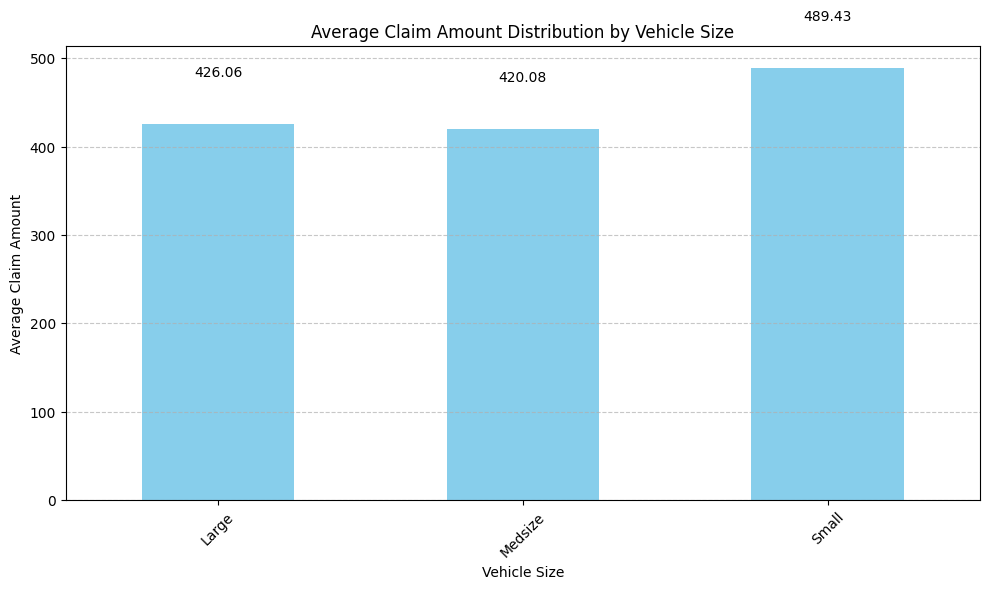

In [ ]:
import matplotlib.pyplot as plt

# Group by vehicle size and calculate the average claim amount for each size
vehicle_size_avg_claim = df.groupby('Vehicle Size')['Total Claim Amount'].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
vehicle_size_avg_claim.plot(kind='bar', color='skyblue')
plt.title('Average Claim Amount Distribution by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the average claim amount on top of each bar
for index, value in enumerate(vehicle_size_avg_claim):
    plt.text(index, value + 50, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### This code BELOW uses a pie chart to show the distribution of total claim amounts and proportion across different vehicle class.

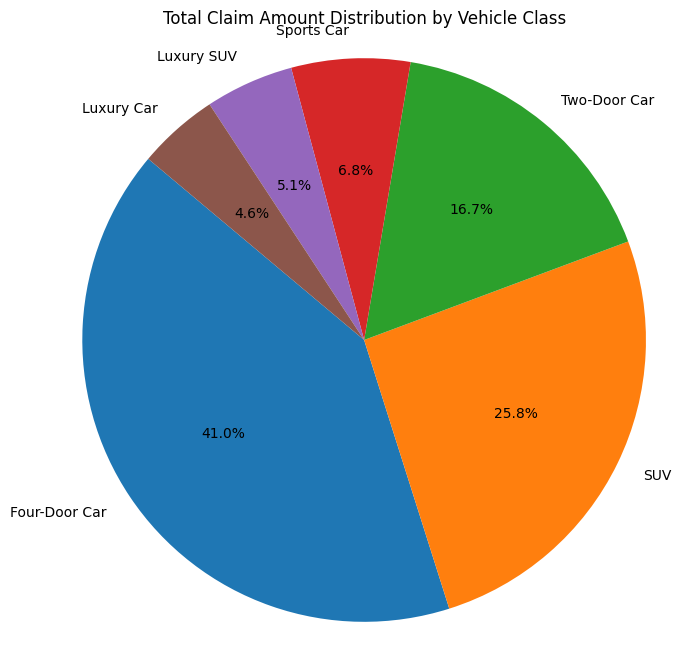

In [ ]:
# Group by vehicle class and calculate the total claim amount for each class
vehicle_class_claim = df.groupby('Vehicle Class')['Total Claim Amount'].sum().sort_values(ascending=False)

# Plot the pie chart for distribution of total claim amount by vehicle class
plt.figure(figsize=(8, 8))
plt.pie(vehicle_class_claim, labels=vehicle_class_claim.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Claim Amount Distribution by Vehicle Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### The code visualizes the average claim amounts for different vehicle classes, providing insights into which vehicle types are associated with higher or lower claim costs. This helps the insurance company in risk assessment and pricing strategies.

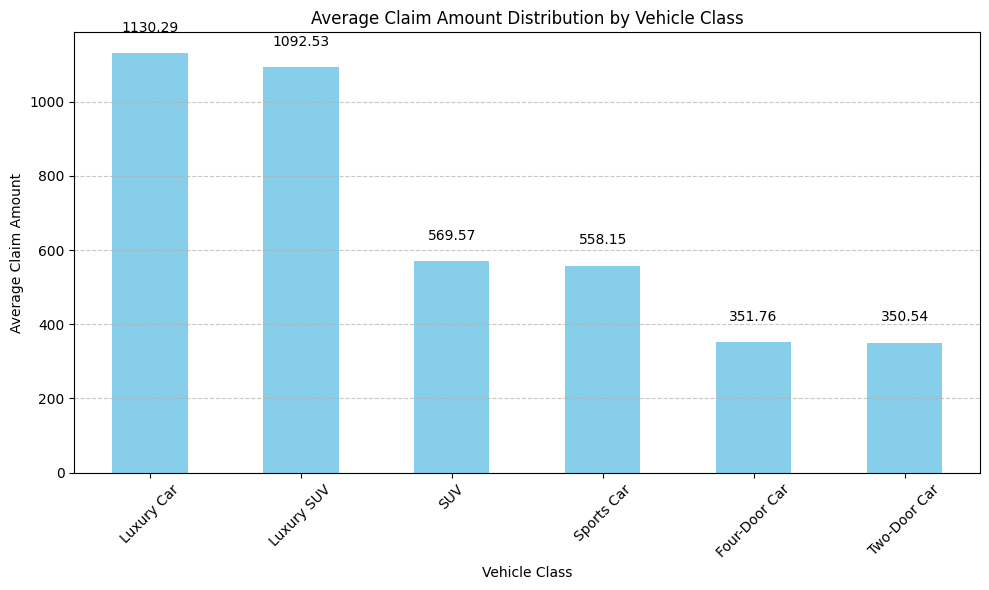

In [ ]:
import matplotlib.pyplot as plt

# Group by vehicle class and calculate the average claim amount for each class
vehicle_class_avg_claim = df.groupby('Vehicle Class')['Total Claim Amount'].mean().sort_values(ascending=False)

# Plot the bar chart for distribution of average claim amount by vehicle class
plt.figure(figsize=(10, 6))
vehicle_class_avg_claim.plot(kind='bar', color='skyblue')
plt.title('Average Claim Amount Distribution by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the average claim amount on top of each bar
for index, value in enumerate(vehicle_class_avg_claim):
    plt.text(index, value + 50, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### This code BELOW visualizes the distribution of vehicle sizes across different education levels. It aims to understand any potential correlation between education levels and preferred vehicle sizes among customers.

<Figure size 1000x600 with 0 Axes>

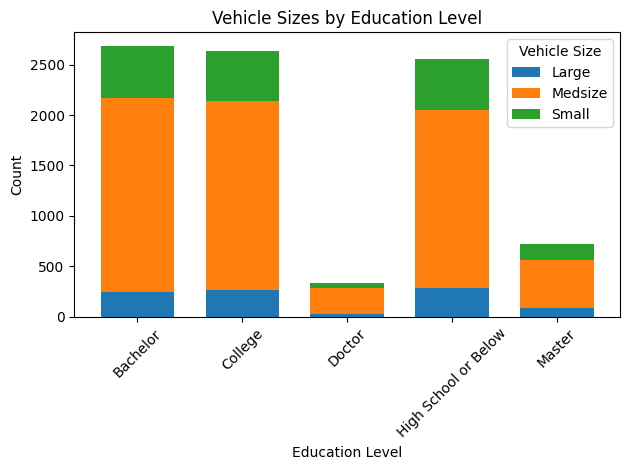

In [ ]:
# vehicle size against education
import matplotlib.pyplot as plt
# Create a DataFrame for plotting
plot_data = df.groupby(['Education', 'Vehicle Size']).size().unstack(fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plot_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.7)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Vehicle Sizes by Education Level')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Size')
plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### This code below calculates the average claim amount for each employment status category. It addresses the business problem of understanding how employment status influences the average claim amount.

In [ ]:
# Group by employment status and calculate the average claim amount
average_claim_by_employment = df.groupby('EmploymentStatus')['Total Claim Amount'].mean()

print(average_claim_by_employment)


EmploymentStatus
Disabled         474.711480
Employed         358.275705
Medical Leave    471.933903
Retired          489.901069
Unemployed       599.579795
Name: Total Claim Amount, dtype: float64


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### This code below visualize the average claim amount for each employment status category.

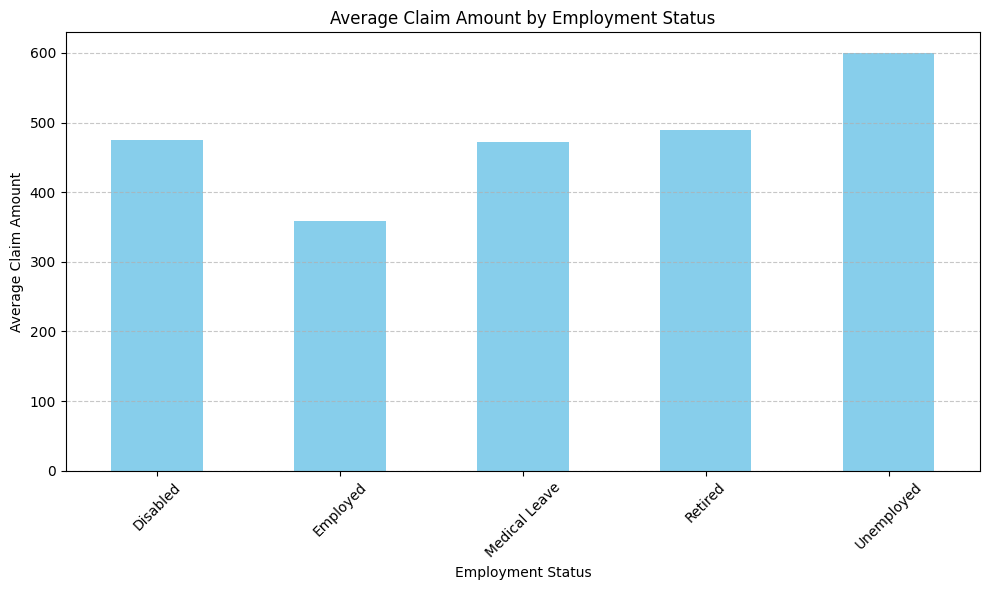

In [ ]:
import matplotlib.pyplot as plt

# Group by employment status and calculate the average claim amount
average_claim_by_employment = df.groupby('EmploymentStatus')['Total Claim Amount'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
average_claim_by_employment.plot(kind='bar', color='skyblue')
plt.xlabel('Employment Status')
plt.ylabel('Average Claim Amount')
plt.title('Average Claim Amount by Employment Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### This code calculates the correlation between monthly auto premiums and total claim amounts. It addresses the business problem of understanding the relationship between these two variables.

In [ ]:
correlation = df['Monthly Premium Auto'].corr(df['Total Claim Amount'])

print(correlation)

0.6320166625194124


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### This code visualizes the relationship between monthly auto premiums and total claim amounts using a regression plot. It addresses the business problem of understanding how changes in monthly premium auto relate to variations in total claim amounts.

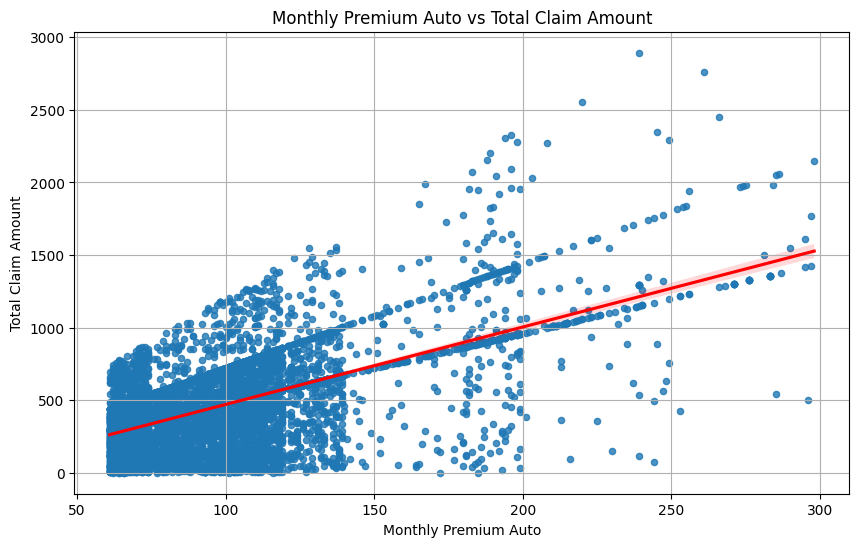

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x='Monthly Premium Auto', y='Total Claim Amount', data=df, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Monthly Premium Auto vs Total Claim Amount')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Total Claim Amount')
plt.grid(True)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### This code calculates and visualizes the average monthly premium for different employment statuses. It aims to address the business problem of understanding how employment status relates to average monthly premium payments.

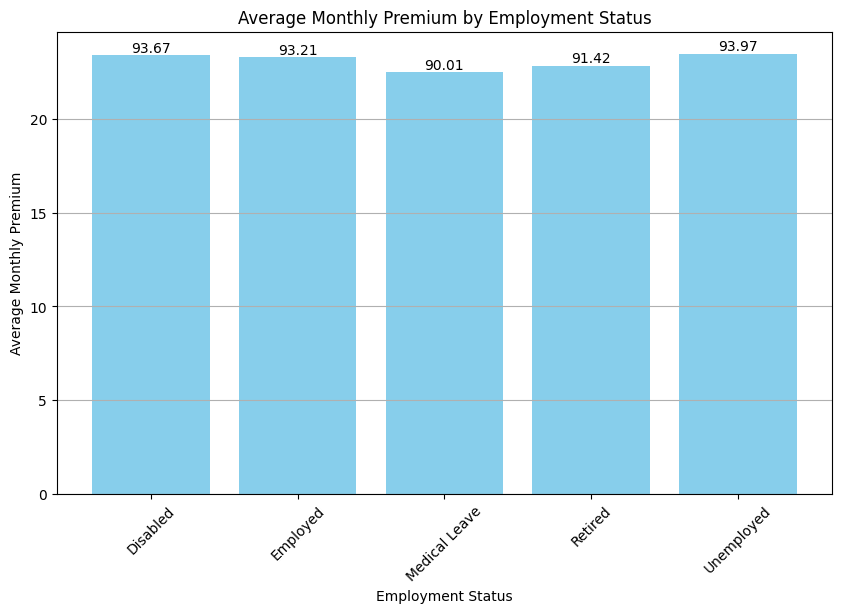

In [ ]:
# Grouping data by 'EmploymentStatus' and calculating the mean of 'Monthly Premium Auto'
grouped_data = df.groupby('EmploymentStatus')['Monthly Premium Auto'].mean().reset_index()

# Dividing Monthly Premium Auto values by a factor to reduce bar height
factor = 0.25
grouped_data['Monthly Premium Auto'] *= factor

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['EmploymentStatus'], grouped_data['Monthly Premium Auto'], color='skyblue')

# Adding text labels for average on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval / factor, 2), va='bottom', ha='center')

plt.title('Average Monthly Premium by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Average Monthly Premium')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### This code analyzes the distribution of total claim amounts by state. It calculates the count of claims for each state, sorts them in descending order, and visualizes the results using a bar graph. The business problem it addresses is understanding the variation in claim counts across different states.

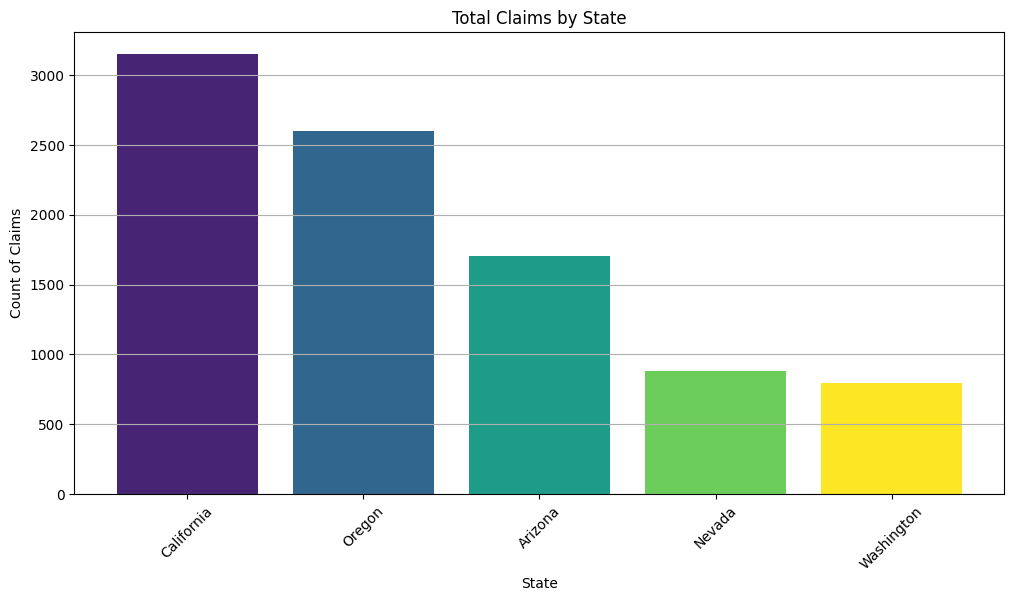

In [ ]:
import numpy as np

# Calculate the count of total claim amounts by state
claim_count_by_state = df.groupby('State')['Total Claim Amount'].count().reset_index()

# Sort the DataFrame by count of total claim amounts in descending order
claim_count_by_state_sorted = claim_count_by_state.sort_values(by='Total Claim Amount', ascending=False)

# Define color intensity based on the count (darker color for higher count)
colors = np.linspace(0.1, 1, len(claim_count_by_state_sorted))

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(claim_count_by_state_sorted['State'], claim_count_by_state_sorted['Total Claim Amount'],
               color=plt.cm.viridis(colors))
plt.title('Total Claims by State')
plt.xlabel('State')
plt.ylabel('Count of Claims')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 6. significance and correlation analysis

In [ ]:
f!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 61.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 18.7 MB/s eta 0:00:00


In [ ]:
# Print data types of columns
print(df.dtypes)


Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


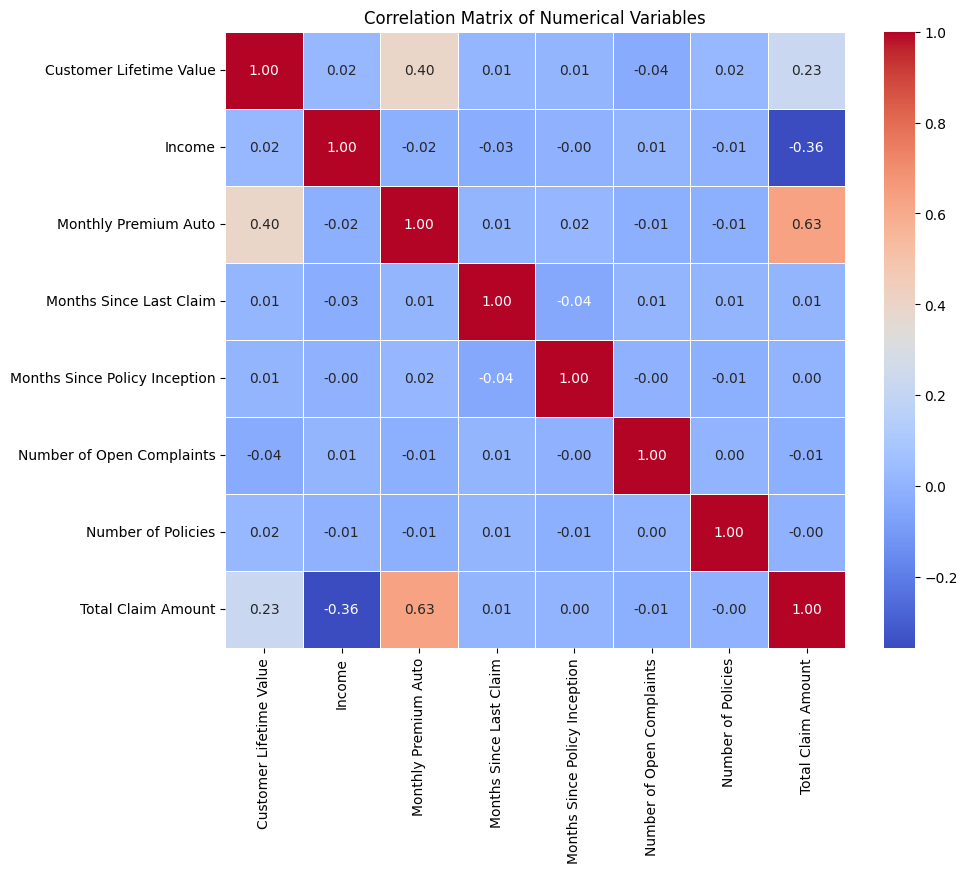

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("abcde.csv")

# Select numerical variables
numerical_vars = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_vars.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")



# Save the plot as an image file
plt.savefig('correlation_matrix.png')
plt.show()


State: p-value=0.6686106236162652
Response: p-value=0.10676600779964925
Coverage: p-value=3.3721208861836087e-166
Education: p-value=nan
Effective To Date: p-value=0.052235091390342166
EmploymentStatus: p-value=1.2210299224920056e-268
Gender: p-value=nan
Location Code: p-value=0.0
Marital Status: p-value=1.1278021262485152e-138
Policy Type: p-value=0.7561491484327955
Policy: p-value=0.9124442742925568


/home/jupyter/notebook-env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:3872: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


Renew Offer Type: p-value=1.5436494912584308e-21
Sales Channel: p-value=0.6625744773204232
Vehicle Class: p-value=0.0
Vehicle Size: p-value=4.2259230271098994e-18
Significant Columns: ['Coverage', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Renew Offer Type', 'Vehicle Class', 'Vehicle Size']


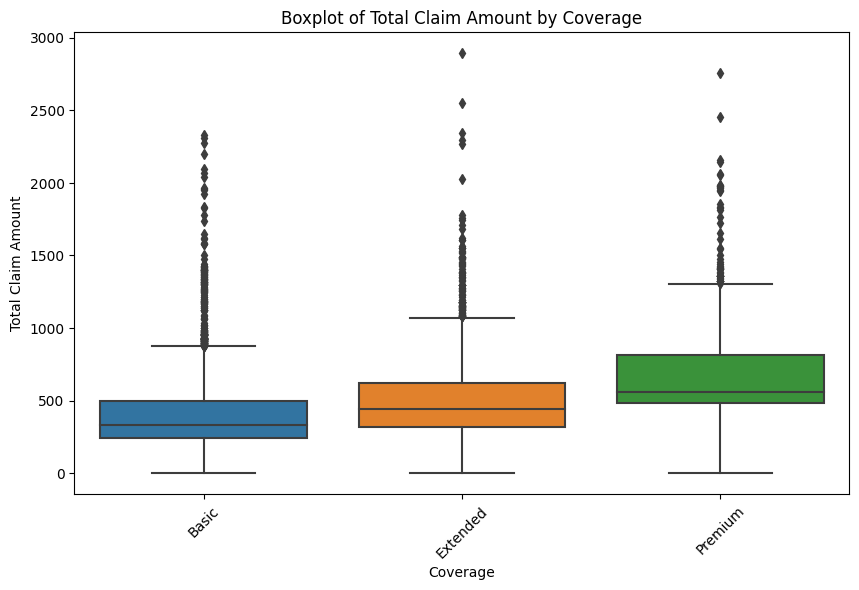

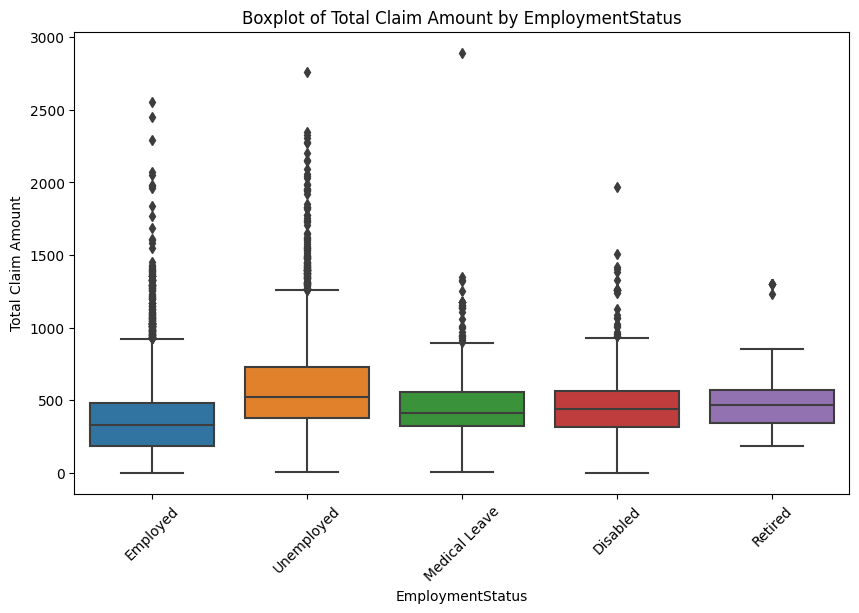

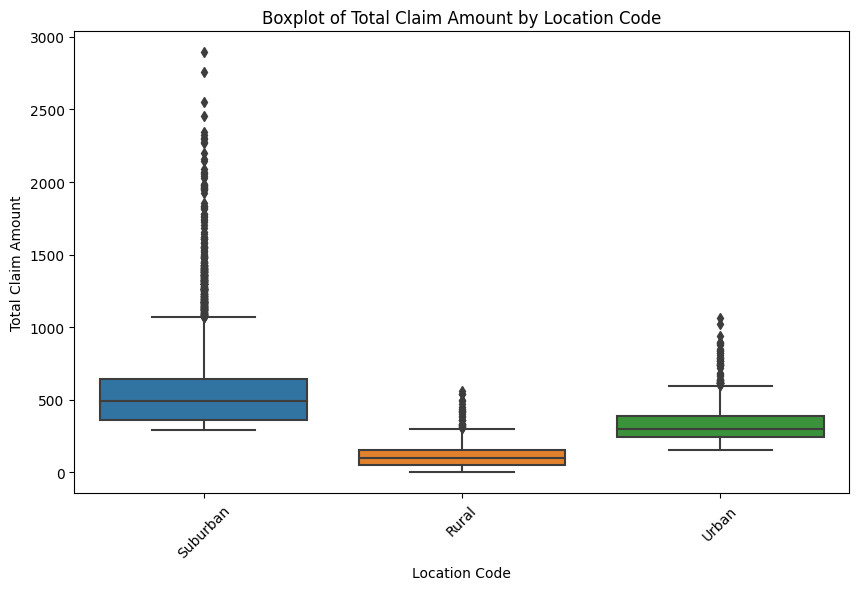

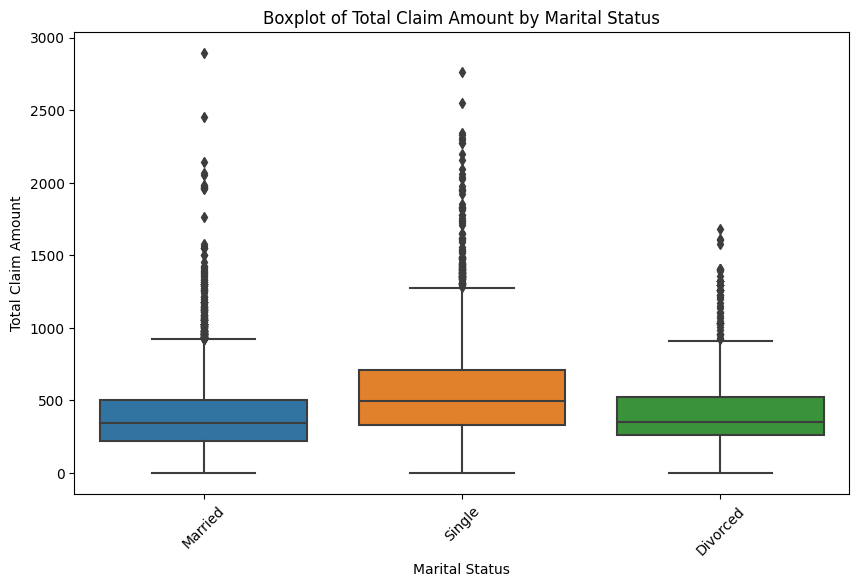

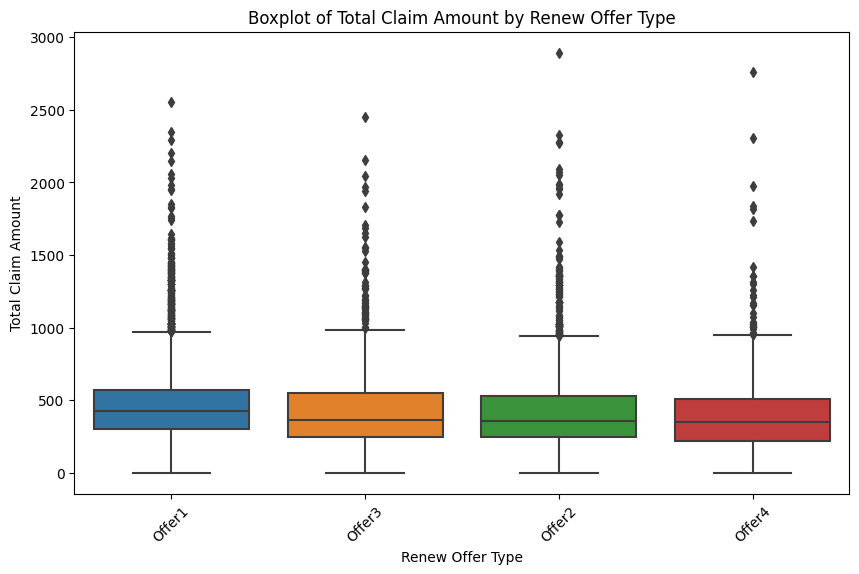

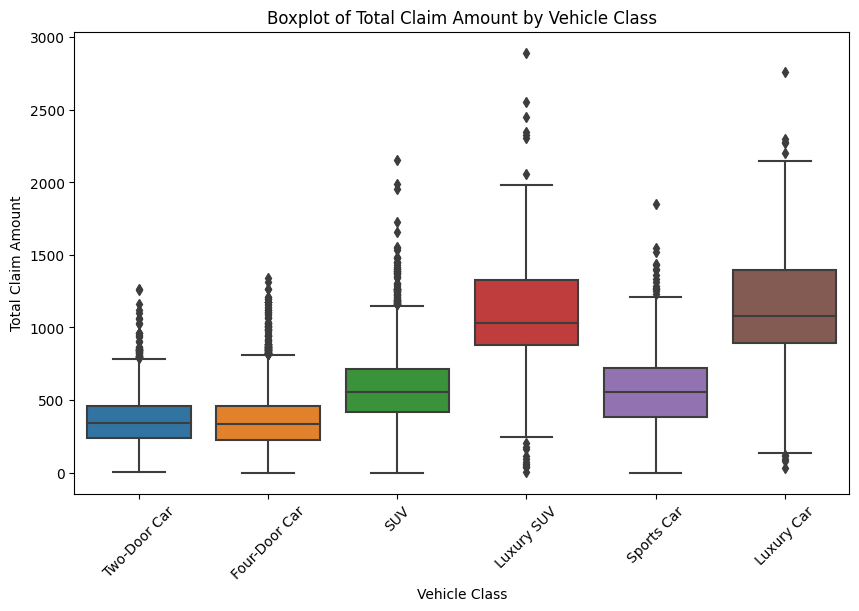

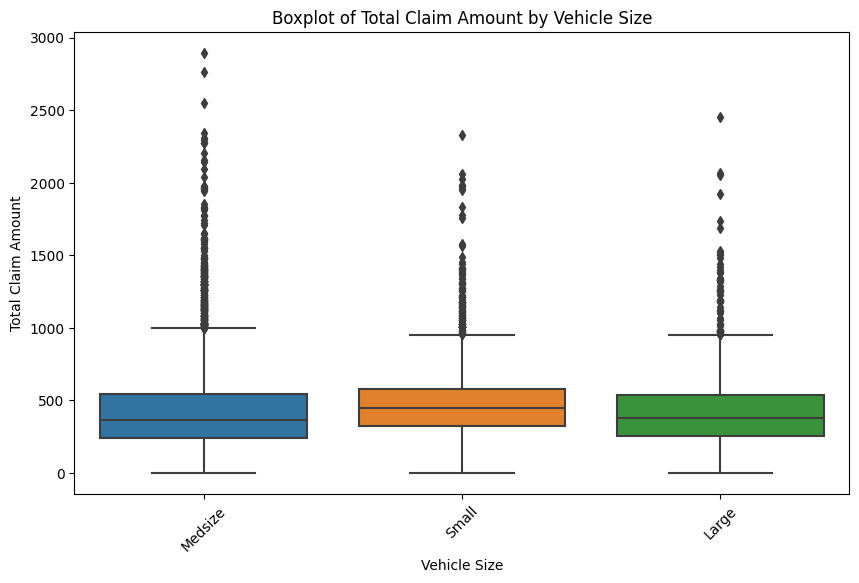

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Read in the data from the CSV file
data = pd.read_csv("abcde.csv")

# Define the list of non-numeric variables
non_numeric_vars = ['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
                    'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
                    'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
                    'Vehicle Class', 'Vehicle Size']

# Initialize an empty list to store significant columns
significant_columns = []

# Perform ANOVA test for each non-numeric variable with 'Total Claim Amount'
for column in non_numeric_vars:
    groups = [data[data[column] == category]['Total Claim Amount'] for category in data[column].unique()]
    statistic, p_value = f_oneway(*groups)
    print(f"{column}: p-value={p_value}")

    # Check if p-value is significant
    if p_value < 0.05:
        significant_columns.append(column)

# Print significant columns
print("Significant Columns:", significant_columns)

# Visualize the ANOVA results using box plots
for column in significant_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='Total Claim Amount', data=data)
    plt.title(f'Boxplot of Total Claim Amount by {column}')
    plt.xlabel(column)
    plt.ylabel('Total Claim Amount')
    plt.xticks(rotation=45)
    plt.show()

State: p-value=0.8955985932127517
Response: p-value=0.39348303047730904
Coverage: p-value=6.0158970099807e-58
Education: p-value=nan
Effective To Date: p-value=0.13786810932400442
EmploymentStatus: p-value=0.00425058662383102
Gender: p-value=nan
Location Code: p-value=0.8976268526407198
Marital Status: p-value=0.036281036735873
Policy Type: p-value=0.11268909882175004
Policy: p-value=0.3041951364145143
Renew Offer Type: p-value=1.238399930571374e-16


/home/jupyter/notebook-env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:3872: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


Sales Channel: p-value=0.4502779502550758
Vehicle Class: p-value=2.085525760212929e-267
Vehicle Size: p-value=0.09237737701331775
Significant Columns: ['Coverage', 'EmploymentStatus', 'Marital Status', 'Renew Offer Type', 'Vehicle Class']


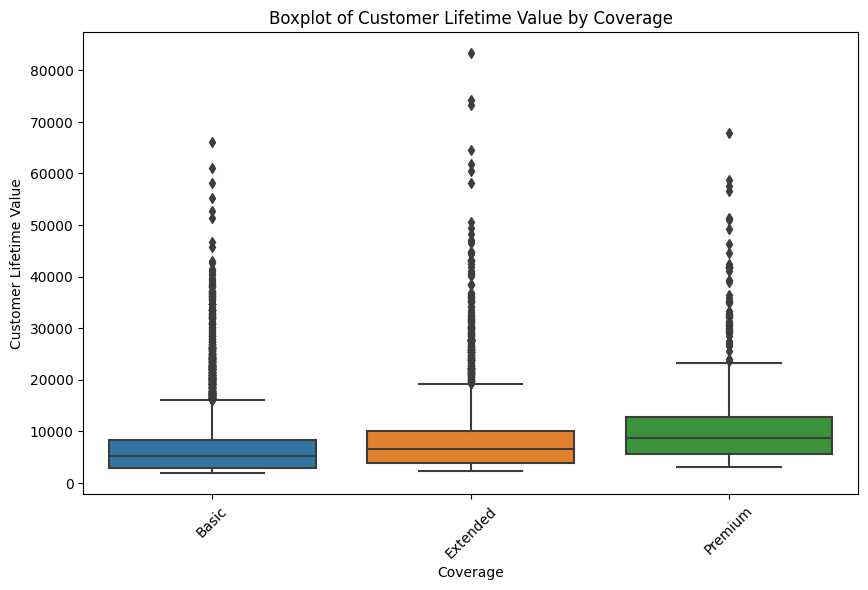

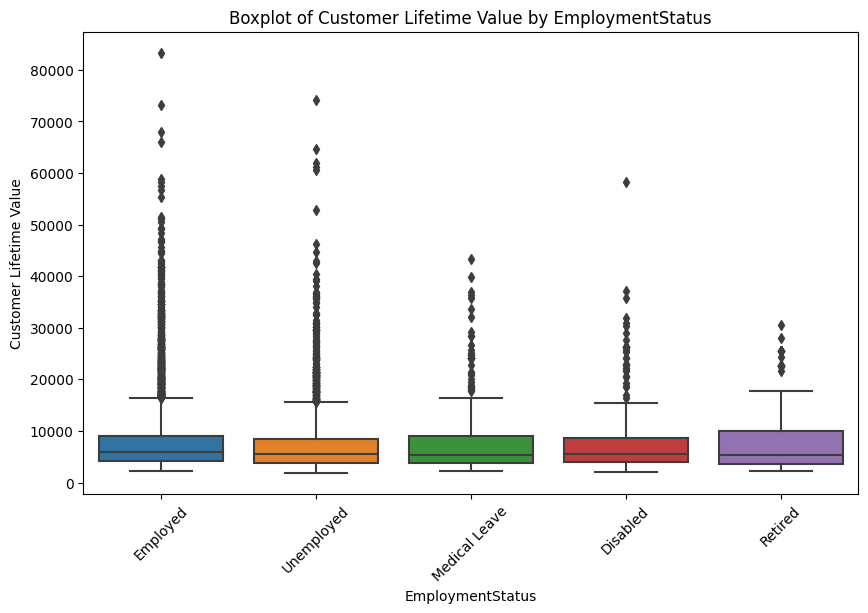

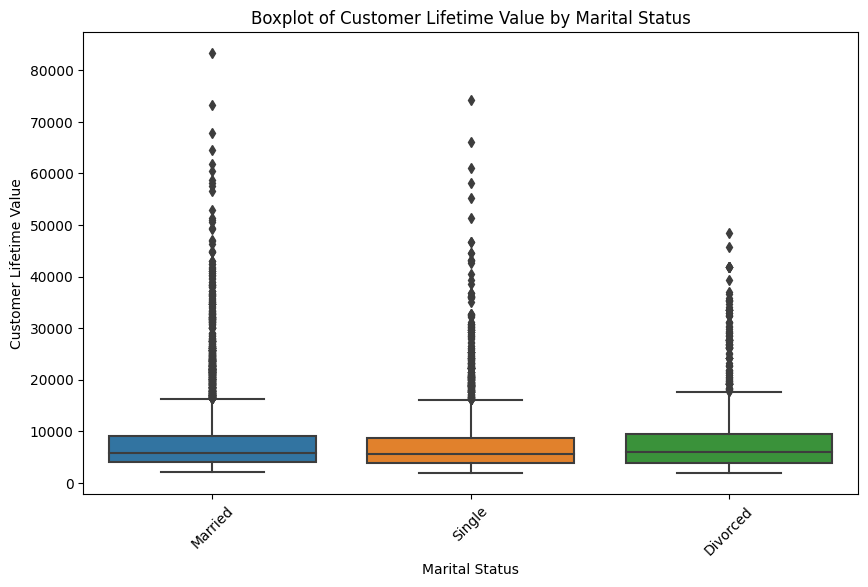

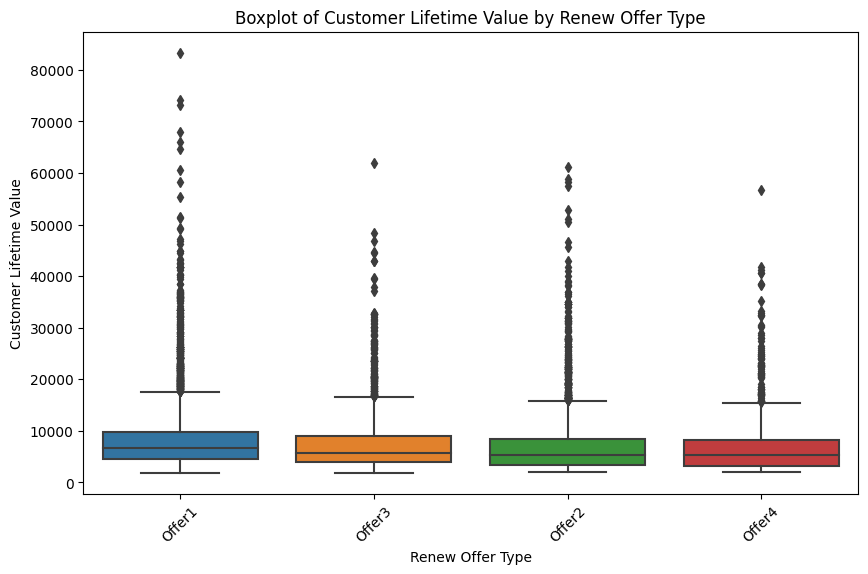

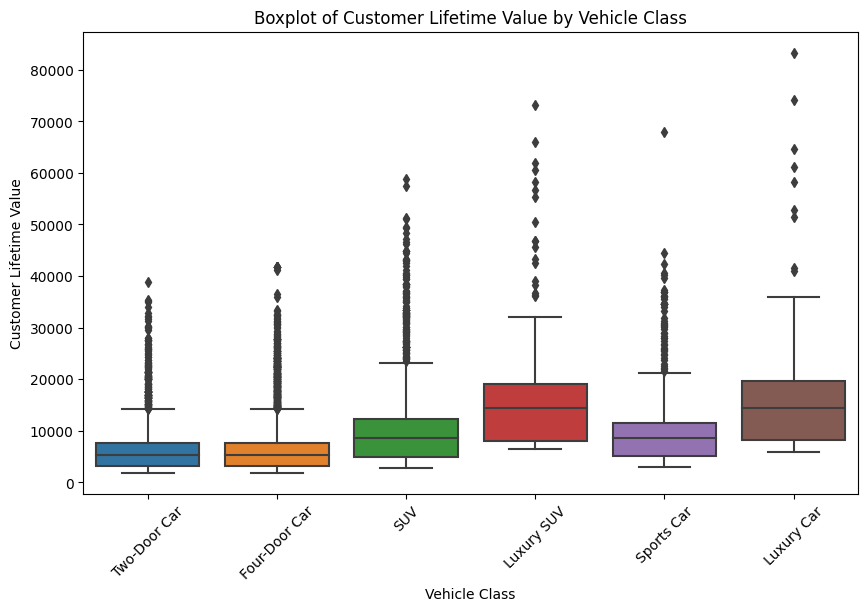

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Read in the data from the CSV file
data = pd.read_csv("abcde.csv")

# Define the list of non-numeric variables
non_numeric_vars = ['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
                    'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
                    'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
                    'Vehicle Class', 'Vehicle Size']

# Initialize an empty list to store significant columns
significant_columns = []

# Perform ANOVA test for each non-numeric variable with 'Customer Lifetime Value'
for column in non_numeric_vars:
    groups = [data[data[column] == category]['Customer Lifetime Value'] for category in data[column].unique()]
    statistic, p_value = f_oneway(*groups)
    print(f"{column}: p-value={p_value}")

    # Check if p-value is significant
    if p_value < 0.05:
        significant_columns.append(column)

# Print significant columns
print("Significant Columns:", significant_columns)

# Visualize the ANOVA results using box plots
for column in significant_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='Customer Lifetime Value', data=data)
    plt.title(f'Boxplot of Customer Lifetime Value by {column}')
    plt.xlabel(column)
    plt.ylabel('Customer Lifetime Value')
    plt.xticks(rotation=45)
    plt.show()


State: p-value=0.6686106236162652
Response: p-value=0.10676600779964925
Coverage: p-value=3.3721208861836087e-166
Education: p-value=nan
Effective To Date: p-value=0.052235091390342166
EmploymentStatus: p-value=1.2210299224920056e-268
Gender: p-value=nan
Location Code: p-value=0.0
Marital Status: p-value=1.1278021262485152e-138
Policy Type: p-value=0.7561491484327955
Policy: p-value=0.9124442742925568


/home/jupyter/notebook-env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:3872: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


Renew Offer Type: p-value=1.5436494912584308e-21
Sales Channel: p-value=0.6625744773204232
Vehicle Class: p-value=0.0
Vehicle Size: p-value=4.2259230271098994e-18
Significant Columns: ['Coverage', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Renew Offer Type', 'Vehicle Class', 'Vehicle Size']


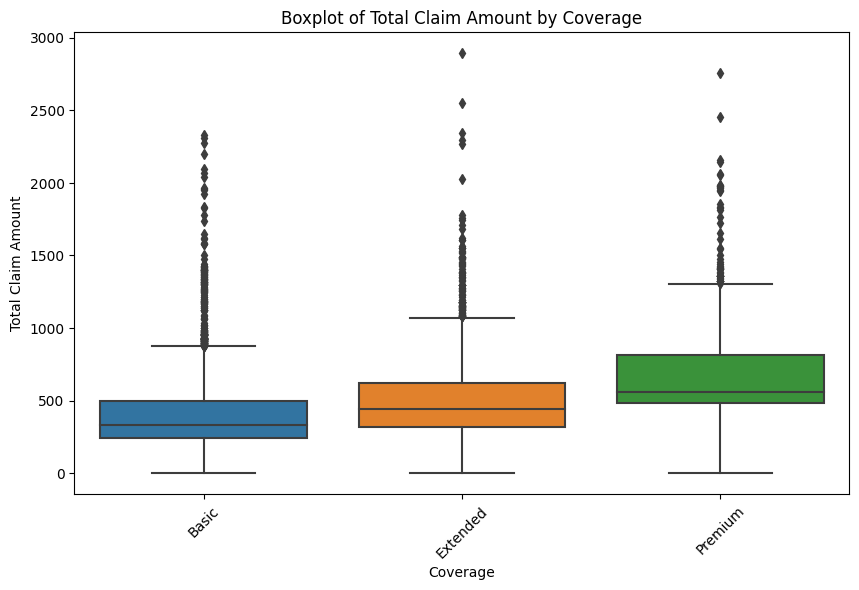

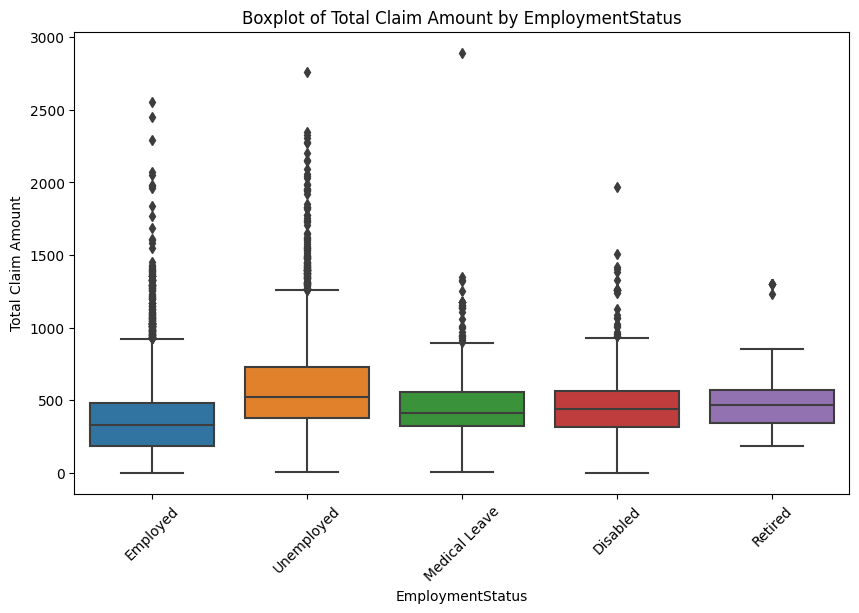

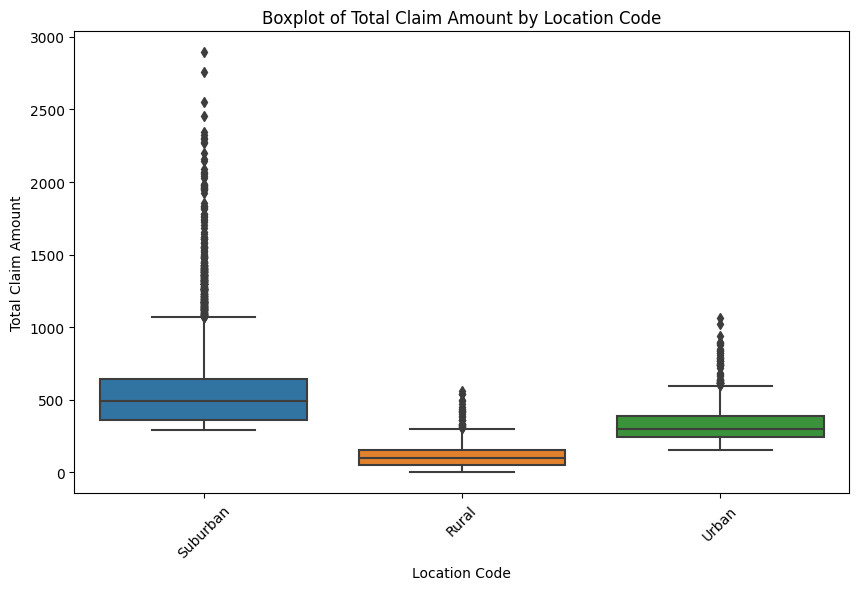

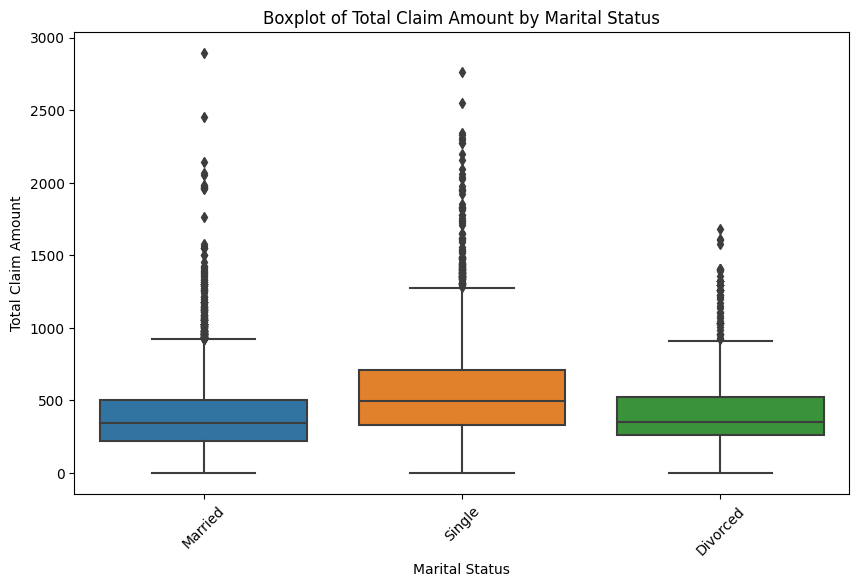

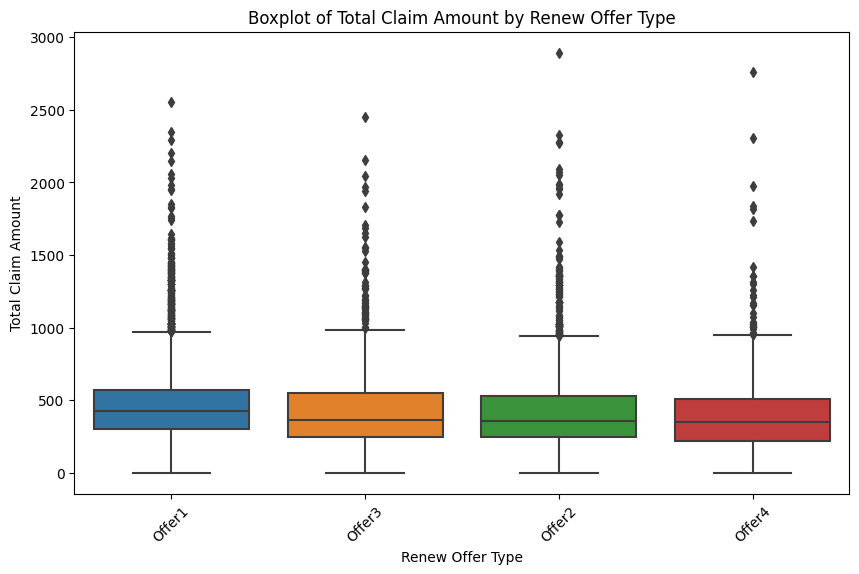

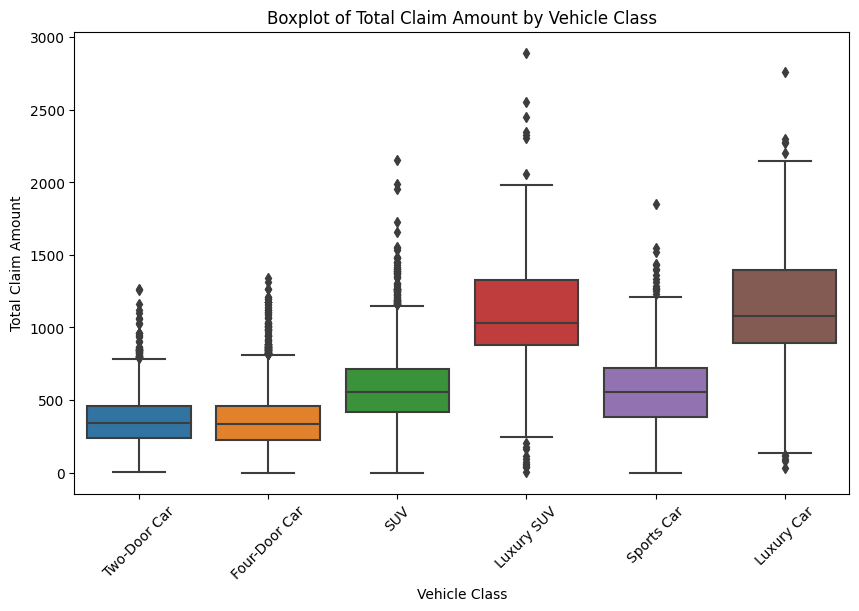

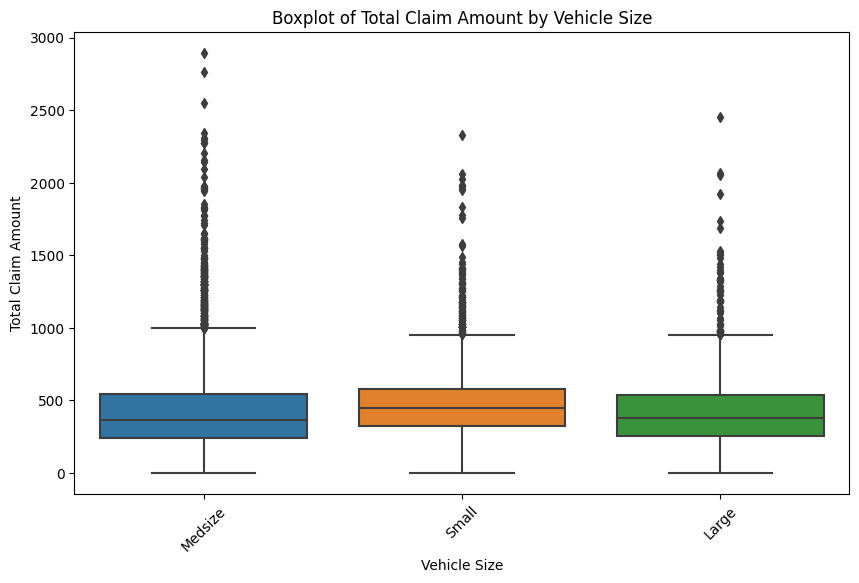


Summary statistics for Coverage:
Coverage
Basic       379.036312
Extended    480.578885
Premium     651.390241
Name: Total Claim Amount, dtype: float64

Summary statistics for EmploymentStatus:
EmploymentStatus
Disabled         474.711480
Employed         358.275705
Medical Leave    471.933903
Retired          489.901069
Unemployed       599.579795
Name: Total Claim Amount, dtype: float64

Summary statistics for Location Code:
Location Code
Rural       109.905095
Suburban    562.159870
Urban       329.572329
Name: Total Claim Amount, dtype: float64

Summary statistics for Marital Status:
Marital Status
Divorced    403.704718
Married     384.517033
Single      557.407396
Name: Total Claim Amount, dtype: float64

Summary statistics for Renew Offer Type:
Renew Offer Type
Offer1    469.165640
Offer2    408.778268
Offer3    423.391734
Offer4    392.847065
Name: Total Claim Amount, dtype: float64

Summary statistics for Vehicle Class:
Vehicle Class
Four-Door Car     351.760366
Luxury Car   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Read in the data from the CSV file
data = pd.read_csv("abcde.csv")

# Define the list of non-numeric variables
non_numeric_vars = ['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
                    'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
                    'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
                    'Vehicle Class', 'Vehicle Size']

# Initialize an empty list to store significant columns
significant_columns = []

# Perform ANOVA test for each non-numeric variable with 'Total Claim Amount'
for column in non_numeric_vars:
    groups = [data[data[column] == category]['Total Claim Amount'] for category in data[column].unique()]
    statistic, p_value = f_oneway(*groups)
    print(f"{column}: p-value={p_value}")

    # Check if p-value is significant
    if p_value < 0.05:
        significant_columns.append(column)

# Print significant columns
print("Significant Columns:", significant_columns)

# Visualize the ANOVA results using box plots
for column in significant_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='Total Claim Amount', data=data)
    plt.title(f'Boxplot of Total Claim Amount by {column}')
    plt.xlabel(column)
    plt.ylabel('Total Claim Amount')
    plt.xticks(rotation=45)
    plt.show()

# Perform textual summary of mean Total Claim Amount for significant columns
for column in significant_columns:
    summary_stats = data.groupby(column)['Total Claim Amount'].mean()
    print(f"\nSummary statistics for {column}:")
    print(summary_stats)
